<a href="https://colab.research.google.com/gist/mindswonder/576dd1dfc9424be5d1a26a049d43fa22/sales_analysis_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce Sales Analysis and Customer Insights: Unraveling Trends and Enhancing Strategies

### Data Cleaning and Preprocessing

#### Import Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Merge 12 months of sales data into a single CSV file

In [4]:
# Unpack all csv files
csv_files = [file for file in os.listdir('./Datafiles/') if file.endswith('.csv')]

for file in csv_files:
    print(file)

Sales_April_2022.csv
Sales_March_2022.csv
Sales_February_2022.csv
Sales_December_2022.csv
Sales_May_2022.csv
Sales_August_2022.csv
Sales_January_2022.csv
Sales_October_2022.csv
Sales_November_2022.csv
Sales_September_2022.csv
Sales_June_2022.csv
Sales_July_2022.csv


In [5]:
# Concatenate data into the empty dataframe and reset the index of merged df
data_frames = []
for file in csv_files:
    file_path = os.path.join('./Datafiles/', file)
    df = pd.read_csv(file_path)
    data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)
merged_df.to_csv('merged_data.csv', index=False)

#### Read in Updated Dataframe

In [6]:
df=pd.read_csv('merged_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,164409,AA Batteries (4-pack),1,3.84,04/25/22 12:40,"194 Willow St, Los Angeles, CA 90001"
1,164410,AA Batteries (4-pack),1,3.84,04/02/22 17:54,"161 Pine St, Dallas, TX 75001"
2,164411,34in Ultrawide Monitor,1,379.99,04/14/22 13:58,"193 Adams St, New York City, NY 10001"
3,164412,Lightning Charging Cable,1,14.95,04/28/22 03:44,"270 Center St, Atlanta, GA 30301"
4,164413,27in FHD Monitor,1,149.99,04/22/22 22:26,"698 River St, Atlanta, GA 30301"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162379 entries, 0 to 162378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          161910 non-null  object
 1   Product           161910 non-null  object
 2   Quantity Ordered  161910 non-null  object
 3   Price Each        161910 non-null  object
 4   Order Date        161910 non-null  object
 5   Purchase Address  161910 non-null  object
dtypes: object(6)
memory usage: 7.4+ MB


#### Drop rows of NaNs and Dupes

In [8]:
# Check for NaNs
nan_df = df[df.isna().any(axis=1)]
nan_df.sum() # Originally there were 469 rows with missing values

df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161910 entries, 0 to 162378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          161910 non-null  object
 1   Product           161910 non-null  object
 2   Quantity Ordered  161910 non-null  object
 3   Price Each        161910 non-null  object
 4   Order Date        161910 non-null  object
 5   Purchase Address  161910 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
# Check for duplicates
print("\nDuplicate Rows:")
df[df.duplicated()]


Duplicate Rows:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
273,164665,USB-C Charging Cable,1,11.95,04/29/22 13:36,"769 8th St, Dallas, TX 75001"
486,164863,AAA Batteries (4-pack),1,2.99,04/08/22 10:20,"866 6th St, Boston, MA 02215"
1042,165395,Lightning Charging Cable,1,14.95,04/23/22 20:48,"795 Cedar St, San Francisco, CA 94016"
1133,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1428,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
159816,210277,Lightning Charging Cable,1,14.95,07/13/22 13:12,"236 South St, Los Angeles, CA 90001"
160658,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
160720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
160902,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Looks like there are "product" in Product column, "Quantity Ordered" in Quantity Ordered column, "Order Date" in Order Date column, etc. We need to get rid of those columns that are invalid and not meaningful.

In [10]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161613 entries, 0 to 162378
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          161613 non-null  object
 1   Product           161613 non-null  object
 2   Quantity Ordered  161613 non-null  object
 3   Price Each        161613 non-null  object
 4   Order Date        161613 non-null  object
 5   Purchase Address  161613 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Convert columns to the correct type

In [11]:
# First, make column names lower case and remove white spaces using the strip() function

columns_mapping = {
    'Order ID': 'order_id',
    'Product': 'product_name',
    'Quantity Ordered': 'quantity',
    'Price Each': 'unit_price',
    'Order Date': 'order_date',
    'Purchase Address': 'address'
}

# rename columns
df = df.rename(columns = columns_mapping)
df.columns = df.columns.str.lower().str.strip()
df.head()

,order_id,product_name,quantity,unit_price,order_date,address
0,164409,AA Batteries (4-pack),1,3.84,04/25/22 12:40,"194 Willow St, Los Angeles, CA 90001"
1,164410,AA Batteries (4-pack),1,3.84,04/02/22 17:54,"161 Pine St, Dallas, TX 75001"
2,164411,34in Ultrawide Monitor,1,379.99,04/14/22 13:58,"193 Adams St, New York City, NY 10001"
3,164412,Lightning Charging Cable,1,14.95,04/28/22 03:44,"270 Center St, Atlanta, GA 30301"
4,164413,27in FHD Monitor,1,149.99,04/22/22 22:26,"698 River St, Atlanta, GA 30301"


In [12]:
# Now let's convert data types
df['quantity'] = df['quantity'].astype('int64')
df['unit_price'] = pd.to_numeric(df['unit_price'])

# Convert the 'order_date' column to datetime type
df['order_date'] = pd.to_datetime(df['order_date'])

df.head()

,order_id,product_name,quantity,unit_price,order_date,address
0,164409,AA Batteries (4-pack),1,3.84,2022-04-25 12:40:00,"194 Willow St, Los Angeles, CA 90001"
1,164410,AA Batteries (4-pack),1,3.84,2022-04-02 17:54:00,"161 Pine St, Dallas, TX 75001"
2,164411,34in Ultrawide Monitor,1,379.99,2022-04-14 13:58:00,"193 Adams St, New York City, NY 10001"
3,164412,Lightning Charging Cable,1,14.95,2022-04-28 03:44:00,"270 Center St, Atlanta, GA 30301"
4,164413,27in FHD Monitor,1,149.99,2022-04-22 22:26:00,"698 River St, Atlanta, GA 30301"


In [13]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161613 entries, 0 to 162378
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      161613 non-null  object        
 1   product_name  161613 non-null  object        
 2   quantity      161613 non-null  int64         
 3   unit_price    161613 non-null  float64       
 4   order_date    161613 non-null  datetime64[ns]
 5   address       161613 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.6+ MB


#### Augment data with additional columns

In [14]:
# Add a month column
df['month'] = df['order_date'].dt.month

# Add a sales column
df['sales'] = df['quantity'] * df['unit_price']
df.head()

,order_id,product_name,quantity,unit_price,order_date,address,month,sales
0,164409,AA Batteries (4-pack),1,3.84,2022-04-25 12:40:00,"194 Willow St, Los Angeles, CA 90001",4,3.84
1,164410,AA Batteries (4-pack),1,3.84,2022-04-02 17:54:00,"161 Pine St, Dallas, TX 75001",4,3.84
2,164411,34in Ultrawide Monitor,1,379.99,2022-04-14 13:58:00,"193 Adams St, New York City, NY 10001",4,379.99
3,164412,Lightning Charging Cable,1,14.95,2022-04-28 03:44:00,"270 Center St, Atlanta, GA 30301",4,14.95
4,164413,27in FHD Monitor,1,149.99,2022-04-22 22:26:00,"698 River St, Atlanta, GA 30301",4,149.99


In [15]:
# Add a city column
# Here we differentiate common city names by adding the state

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,order_id,product_name,quantity,unit_price,order_date,address,month,sales,city
0,164409,AA Batteries (4-pack),1,3.84,2022-04-25 12:40:00,"194 Willow St, Los Angeles, CA 90001",4,3.84,Los Angeles (CA)
1,164410,AA Batteries (4-pack),1,3.84,2022-04-02 17:54:00,"161 Pine St, Dallas, TX 75001",4,3.84,Dallas (TX)
2,164411,34in Ultrawide Monitor,1,379.99,2022-04-14 13:58:00,"193 Adams St, New York City, NY 10001",4,379.99,New York City (NY)
3,164412,Lightning Charging Cable,1,14.95,2022-04-28 03:44:00,"270 Center St, Atlanta, GA 30301",4,14.95,Atlanta (GA)
4,164413,27in FHD Monitor,1,149.99,2022-04-22 22:26:00,"698 River St, Atlanta, GA 30301",4,149.99,Atlanta (GA)


### Data Exploration, Analysis and Visualization

#### 1. Monthly Sales Trends. What was the best month for sales? How much was earned that month?

In [16]:
# Group the data by month to calculate total sales
monthly_sales = df.groupby(['month'])['sales'].sum()
# Sort monthly_sales in descending order
monthly_sales_sorted = monthly_sales.sort_values(ascending=False)
monthly_sales_sorted

month
12    5008611.17
11    4404885.26
10    3001026.62
5     2943688.10
4     2864747.53
7     2639130.83
1     2064084.96
8     1927793.36
9     1915130.68
3     1226580.11
2     1130584.55
6     1072238.33
Name: sales, dtype: float64

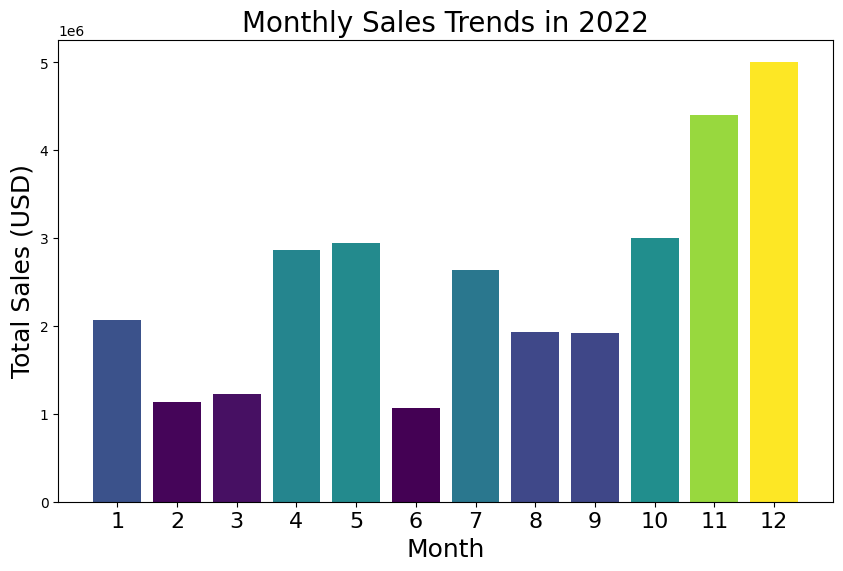

In [17]:
# Plot monthly sales trends
plt.figure(figsize=(10, 6))
months = monthly_sales.index

# Get the normalized values of sales for colormap
normalized_sales = (monthly_sales - monthly_sales.min()) / (monthly_sales.max() - monthly_sales.min())

plt.bar(months, monthly_sales.values, color=plt.cm.viridis(normalized_sales))
plt.xlabel('Month', fontsize=18)
plt.ylabel('Total Sales (USD)', fontsize=18)
plt.title('Monthly Sales Trends in 2022', fontsize=20)
plt.xticks(months, fontsize=16)
# plt.yticks(monthly_sales.values, fontsize=12)
plt.show()

Apparently, the 4th quarter of 2022 was the best season for the whole year. December had the highest sales. November, October, May, April and July were also strong and active months. Lower sales in the beginning of the year could be a typical post-holiday syndrome, and lowest sales in June could be due to the absence of significant shopping events. The sales trends can guide us on planning future marketing strategies, inventory management, and targeted promotions to maximize revenue and capitalize on high-sales periods. For example, focusing on special promotions during the holiday season, capitalizing on major shopping events like Black Friday, and tailoring marketing campaigns to meet customer demands during peak sales months can significantly impact sales and overall business growth.

#### 2. Sales by city: Which city had the highest total sales during the year?

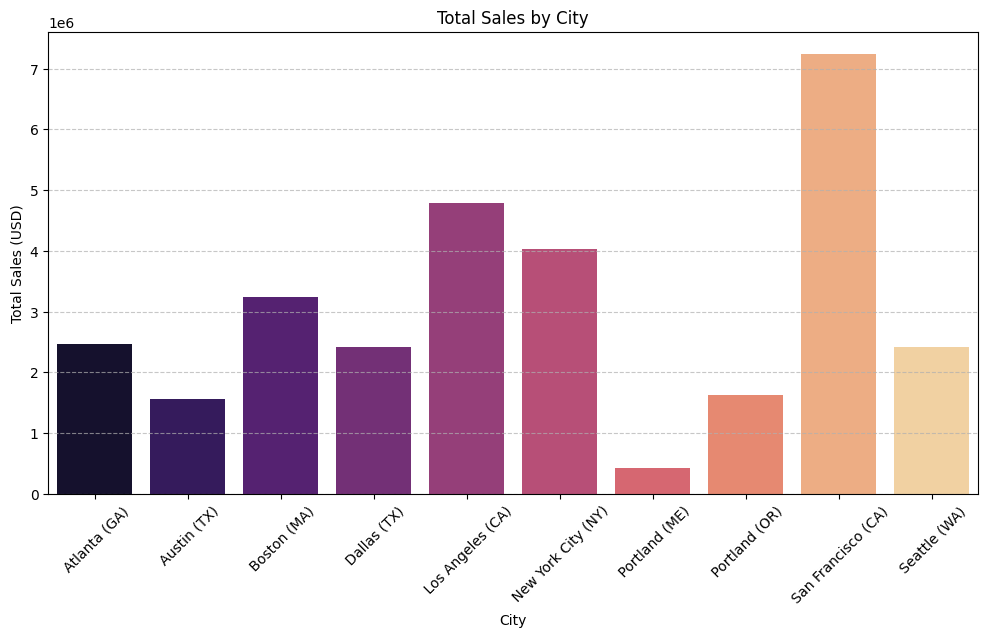

In [18]:
 # Calculate the total sales for each city
sales_by_city = df.groupby('city')['sales'].sum()

# Plot the total sales for each city using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='magma')
plt.xlabel('City')
plt.ylabel('Total Sales (USD)')
plt.title('Total Sales by City')
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

San Francisco and New York City stand out as the top-performing cities in terms of sales. These cities had significantly higher total sales compared to others, indicating strong market demand or economic activity. Los Angeles and Boston also showed robust sales performance. In order to gain a deeper understanding of the sales distribution, it might be useful to analyze the factors that contribute to the success of top-performing cities. This analysis could involve considering factors such as local demographics, economic conditions, marketing strategies targeted towards specific regions, and product preferences in each city.

#### 3. Top-selling products: Which products were the top sellers in terms of total revenue?   How does the sales performances compare to other non-top products?  What products sold the most? Why do you think it sold the most?

In [19]:
# Calculate the total sales for each product
product_sales = df.groupby('product_name')['sales'].sum()

# Sort the products in descending order of sales
top_selling_products = product_sales.sort_values(ascending=False)
top_selling_products

product_name
Macbook Pro Laptop            7165500.00
iPhone                        4181100.00
ThinkPad Laptop               3603963.96
Google Phone                  2832600.00
27in 4K Gaming Monitor        2136755.21
34in Ultrawide Monitor        2098304.78
Apple Airpods Headphones      2034450.00
Flatscreen TV                 1229400.00
Bose SoundSport Headphones    1165983.39
27in FHD Monitor               995633.62
Vareebadd Phone                706400.00
20in Monitor                   398933.73
LG Dryer                       366000.00
LG Washing Machine             348600.00
Lightning Charging Cable       302259.10
USB-C Charging Cable           246420.95
Wired Headphones               213122.25
AA Batteries (4-pack)           92939.52
AAA Batteries (4-pack)          80134.99
Name: sales, dtype: float64

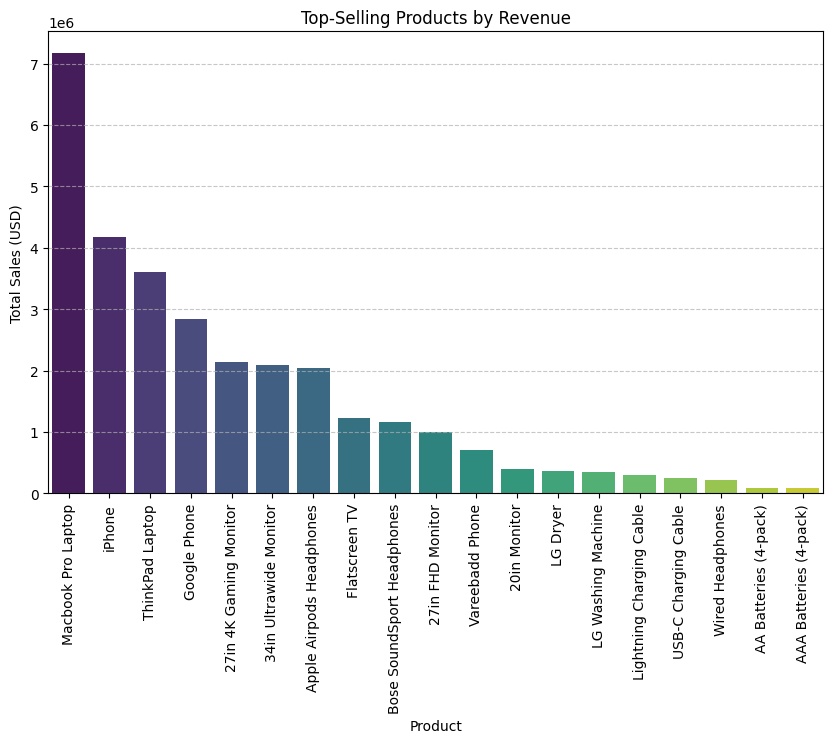

In [20]:
# Plot the top-selling products using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette='viridis')
plt.xlabel('Product')
plt.ylabel('Total Sales (USD)')
plt.title('Top-Selling Products by Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Laptops, cellphones, and monitors are on top of the list in terms of revenue generation. Those products perform exceptionally well in the market throughout the year. Now, let's find out what are the most sold products.

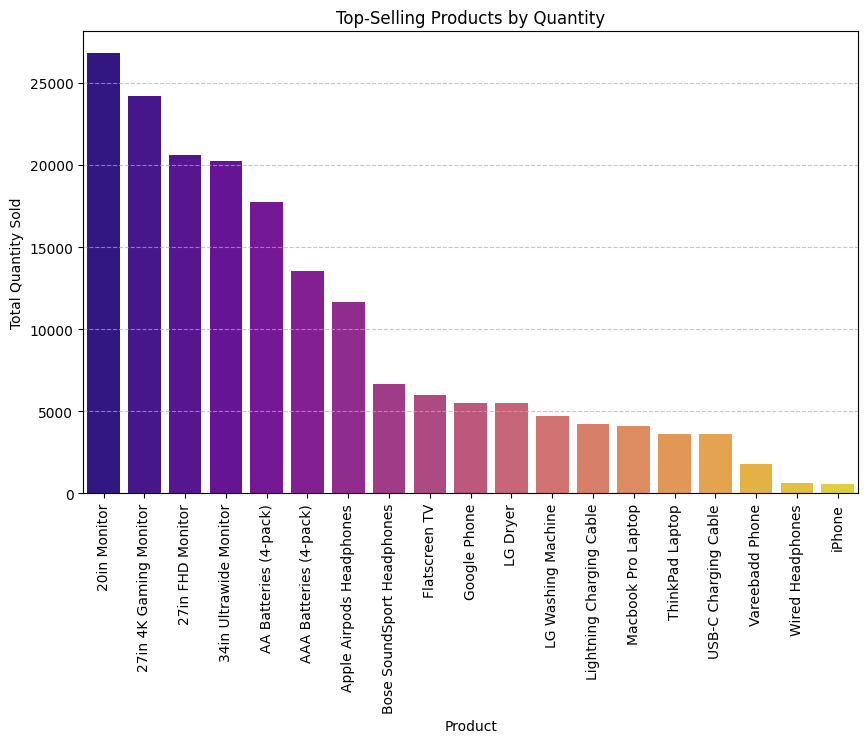

In [21]:
# group by products
product_group = df.groupby('product_name')
quantity_ordered = df.groupby('product_name')['quantity'].sum()
# sort the products in descending order of quantity sold
quantity_ordered = quantity_ordered.sort_values(ascending=False)


products = [product for product, df in product_group]

# Plot the top-selling products using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=products, y=quantity_ordered, palette='plasma')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top-Selling Products by Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above figure shows that monitors were the most popular tech products in 2022. Batteries and headphones were also high in demand. This might be due to the remote work and learning trends, the popularity of wireless technology, as well as the rise of gaming and home entertainment activities in recent years.

Now, at this point, I wonder if high unit price means high revenue? Let's find out!

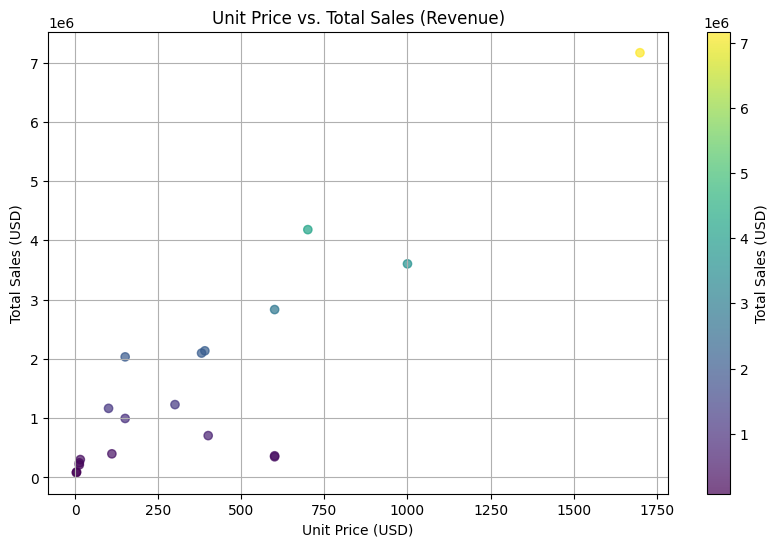

Correlation Coefficient between Unit Price and Total Sales (Revenue): 0.8685523611337117


In [22]:
# Calculate the total sales for each product
product_sales = df.groupby('product_name')['sales'].sum()
# Calculate the unit price for each product
unit_price = df.groupby('product_name')['unit_price'].mean()

# Plot a scatter plot of unit price vs. total sales (revenue)
plt.figure(figsize=(10, 6))
plt.scatter(unit_price, product_sales, c=product_sales, cmap='viridis', alpha=0.7)
plt.xlabel('Unit Price (USD)')
plt.ylabel('Total Sales (USD)')
plt.title('Unit Price vs. Total Sales (Revenue)')
plt.colorbar(label='Total Sales (USD)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = unit_price.corr(product_sales)
print("Correlation Coefficient between Unit Price and Total Sales (Revenue):", correlation_coefficient)

Well, we indeed find a strong positive correlation between unit price and total sales (revenue) of products. It suggests that increasing unit price of certain prodcuts or selling high unit-price products could generate more revenue for the business. However, it's always important to strike a balance. In practice, the business can focus on marketing and promoting higher-priced products, as they have a greater impact on revenue generation.

I also assume that unit price and quantity sold are negatively related. Let's plot them on the same graph to see how they are related:

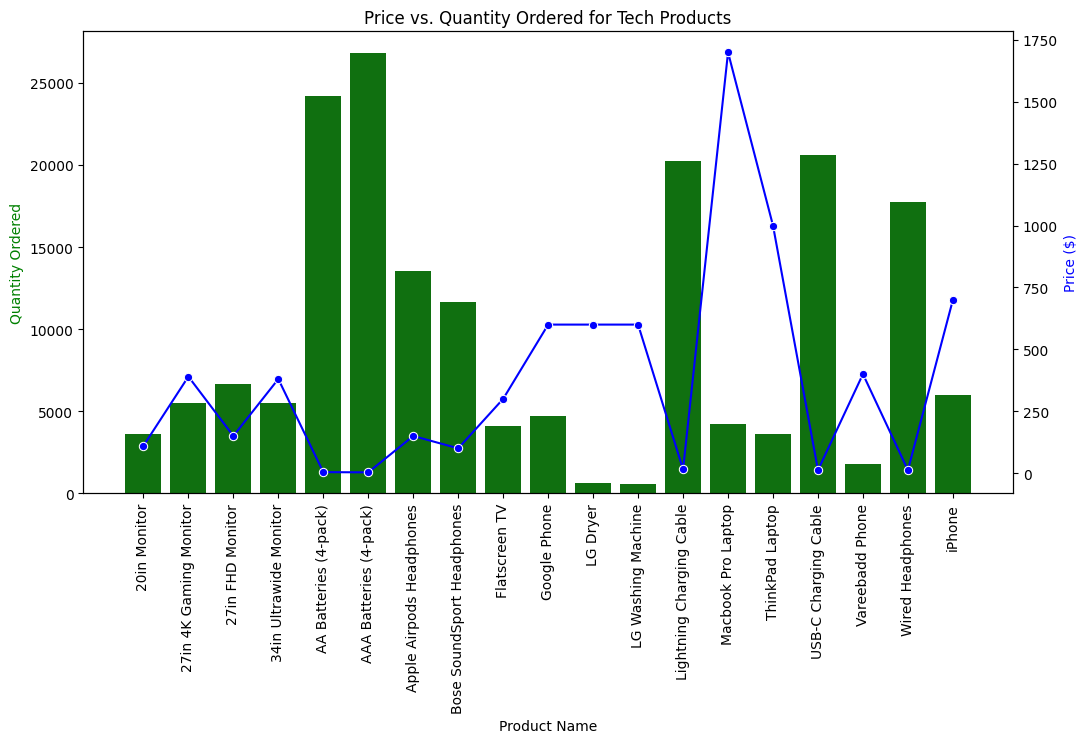

In [23]:
# Calculate the average price for each product
prices = df.groupby('product_name')['unit_price'].mean()

# Calculate the total quantity ordered for each product
quantity_ordered = df.groupby('product_name')['quantity'].sum()

# Create a figure and axes
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=quantity_ordered.index, y=quantity_ordered.values, color='green')
ax2 = ax1.twinx()
sns.lineplot(x=prices.index, y=prices.values, marker='o', color='blue', ax=ax2)

# Customize the plot
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='green')
ax2.set_ylabel('Price ($)', color='blue')
ax1.set_xticklabels(quantity_ordered.index, rotation='vertical', fontsize=10)
plt.title('Price vs. Quantity Ordered for Tech Products')

plt.show()

Visually, products with lower average prices were sold in larger quantities, which is aligned with our hypothesis.

#### 4. Average Order Value (AOV): What was the AOV for year 2022? How did the AOV change over different months, and are there any significant deviations we should investigate?

In [24]:
# Calculate the AOV for the entire year
aov_year = df['sales'].sum() / df['order_id'].nunique()
print("Average Order Value (AOV) for the year (USD):", aov_year)

Average Order Value (AOV) for the year (USD): 194.75239744358666


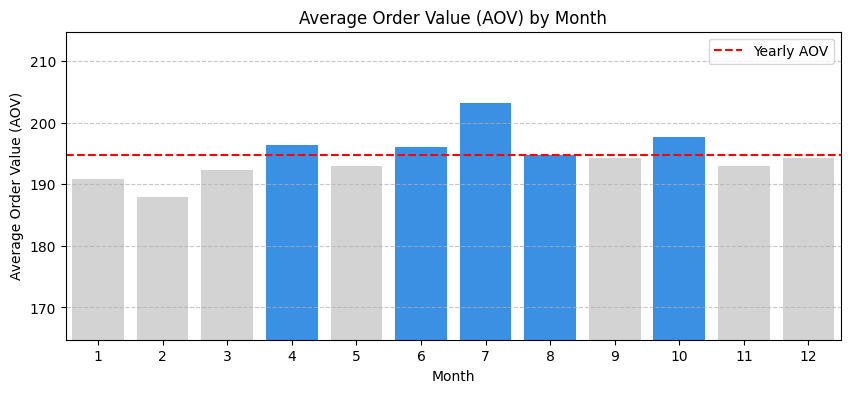

In [25]:
# Calculate the AOV for each month
aov_month = df.groupby('month')['sales'].sum() / df.groupby('month')['order_id'].nunique()

# Set color palette so that monthly AOV greater than aov_year will be highlighted
colors = ['dodgerblue' if aov > aov_year else 'lightgray' for aov in aov_month]

# Plot the AOV over different months
plt.figure(figsize=(10, 4))
sns.barplot(x=aov_month.index, y=aov_month.values, palette=colors)
plt.axhline(y=aov_year, color='red', linestyle='--', label='Yearly AOV')
plt.xlabel('Month')
plt.ylabel('Average Order Value (AOV)')
plt.title('Average Order Value (AOV) by Month')
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(aov_year - 30, aov_year + 20)
plt.legend()
plt.show()

In [26]:
# Calculate AOV, number of orders, total sales, and deviation from aov_year for each month
monthly_data = df.groupby('month').agg({
    'order_id': 'nunique',                 # Number of orders (unique order IDs)
    'sales': 'sum',                  # Total sales for each month
})

monthly_data['aov'] = (monthly_data['sales'] / monthly_data['order_id']).round(2)
monthly_data['deviation'] = monthly_data['aov'] - aov_year
monthly_data['deviation_pct'] = ((aov_month - aov_year) / aov_year * 100).round(2)

# Rename the columns for clarity
monthly_data.rename(columns={
    'order_id': 'num_of_orders',
    'sales': 'total_sales',
}, inplace=True)

print(monthly_data)

       num_of_orders  total_sales     aov  deviation  deviation_pct
month                                                              
1              10814   2064084.96  190.87  -3.882397          -1.99
2               6014   1130584.55  187.99  -6.762397          -3.47
3               6379   1226580.11  192.28  -2.472397          -1.27
4              14591   2864747.53  196.34   1.587603           0.81
5              15254   2943688.10  192.98  -1.772397          -0.91
6               5469   1072238.33  196.06   1.307603           0.67
7              12987   2639130.83  203.21   8.457603           4.34
8               9896   1927793.36  194.81   0.057603           0.03
9               9862   1915130.68  194.19  -0.562397          -0.29
10             15177   3001026.62  197.74   2.987603           1.53
11             22832   4404885.26  192.93  -1.822397          -0.94
12             25786   5008611.17  194.24  -0.512397          -0.26


In [27]:
# Now let's test if any deviations are statistically different:
for month in range(1, 13):

    # Perform one-sample t-test for each month's AOV against the yearly AOV
    t_stat, p_value = stats.ttest_1samp(aov_month[month], aov_year)

    # Check for statistical significance (alpha = 0.05)
    if p_value < 0.05 and aov_month[month] > aov_year:
        print(f"Month {month} has a statistically significant higher AOV than the yearly AOV.")
    elif p_value < 0.05 and aov_month[month] < aov_year:
        print(f"Month {month} has a statistically significant lower AOV than the yearly AOV.")

This section completes an analysis of the average order value (AOV) in 2022. Besides sales, AOV is also an important metric for e-commerce businesses to keep track of as it is a key indicator of revenue. The yearly AOV was 194.75, and July had the highest AOV ($203.21) compared to other months. According to previous monthly sales analysis, December had the highest number of orders and total sales, and July only ranked 5th on that list, yet it was the winner for AOV, which is pretty interesting. This could be due to special campaigns and promotions, product bundling, customer shopping habits, or other seasonal reasons. However, none of the deviations were significant.

#### 5. Customer Behavior Analysis: How many repeat customers did we have during the year, and what was their contribution to total sales? Can we identify loyal customers who made multiple purchases? What products are often sold together? How should we bundle them up?

In [28]:
# first, count the number of orders for each customer based on unique addresses
customer_orders = df.groupby('address')['order_id'].nunique()
repeat_customers = customer_orders[customer_orders > 1]
# Calculate the contribution of repeat customers to total sales
repeat_customers_sales = df[df['address'].isin(repeat_customers.index)]['sales'].sum()

# Calculate the percentage contribution to total sales
total_sales = df['sales'].sum()
repeat_customers_contribution = (repeat_customers_sales / total_sales) * 100

print("Number of repeat customers:", len(repeat_customers))
print(f"Contribution of repeat customers to total sales: {repeat_customers_contribution:.2f}%")


Number of repeat customers: 24240
Contribution of repeat customers to total sales: 34.38%


In [34]:
def customers_at_least_n_purchases(df, n):
    """
    Count the total number of customers who have made more than 'n' purchases and calculate the percentage
    relative to the whole customer base.

    Parameters:
        df (DataFrame): The DataFrame containing sales data with 'address' and 'order_id' columns.
        n (int): The minimum number of purchases to consider (n >= 0).

    Returns:
        int: Total number of customers who have made more than 'n' purchases.
        float: Percentage of customers who have made more than 'n' purchases relative to the whole customer base.
    """
    # Calculate the total number of orders for each customer based on unique addresses
    customer_orders = df.groupby('address')['order_id'].nunique()
    total_unique_customers = len(customer_orders)

    customers_at_least_n_purchases = customer_orders[customer_orders >= n]
    num_customers = len(customers_at_least_n_purchases)

    # Calculate the percentage of customers who have made more than n purchases
    pct_n_purchases = (num_customers / total_unique_customers) * 100

    return num_customers, pct_n_purchases

# Get user input for the value of 'n'
n = int(input("Enter the minimum number of purchases (n): "))

# Call the function and print the result
num_customers, pct_n_purchases = customers_at_least_n_purchases(df, n)
print(f"Total number of customers with at least {n} purchases: {num_customers}({pct_n_purchases:.2f}%)")

Enter the minimum number of purchases (n):  5


Total number of customers with at least 5 purchases: 77(0.06%)


In [35]:
# Segment loyal customers
loyal_customers = customer_orders[customer_orders >= 6]
num_lc = len(loyal_customers)
print("Total number of customers with at least 6 purchases:" , num_lc)

Total number of customers with at least 6 purchases: 5


In [36]:
# Use the 'isin' method to filter 'df' by the addresses of loyal customers
loyal_customers_data = df[df['address'].isin(loyal_customers.index)]

# Group the loyal customers' data by 'address' and calculate the total sales for each loyal customer
loyal_customers_total_sales = loyal_customers_data.groupby('address')['sales'].sum()

# Print out the addresses and total sales of the loyal customers
print("Loyal Customers:")
print("------------------------------------------------------------")
[print(f"{i+1}. Address: {address:<50} Total Sales: {total_sales:.2f}") for i, (address, total_sales) in enumerate(loyal_customers_total_sales.items())]
print("------------------------------------------------------------")

Loyal Customers:
------------------------------------------------------------
1. Address: 143 Ridge St, Los Angeles, CA 90001                Total Sales: 797.92
2. Address: 279 Lincoln St, San Francisco, CA 94016            Total Sales: 1306.92
3. Address: 314 Hill St, San Francisco, CA 94016               Total Sales: 2761.94
4. Address: 735 6th St, San Francisco, CA 94016                Total Sales: 55.52
5. Address: 738 1st St, San Francisco, CA 94016                Total Sales: 178.61
------------------------------------------------------------


In this analysis, "unique" customers were defined and grouped by addresses since we do not have other customer information. Out of the 126125 customers (total base), more than 1/3 had repeated purchases with us. Regarding loyal customers, there were 77 with more than 5 purchases and only 5 people placed more than 6 orders. Those customers were active frequent shoppers in 2022. Notice that frequent shoppers are not top customers with the highest sales contribution. In practice, both active and top users are essential to our business, we can send special offers, discounts, or loyalty rewards to incentivize them to become brand/site advocates.

##### Now let's find out what products are often sold together and how should we bundle them up.

In [37]:
# Preprocess the data by only keeping unique pairs of order_id and product_name
# Then count the occurrences of each item pair to get the frequencies

# Filter to keep orders with multiple items and then create a grouped products column for each order_id
df1 = df[df['order_id'].duplicated(keep=False)]
df1['grouped_products'] = df1.groupby('order_id')['product_name'].transform(lambda x: ','.join(x))

df1 = df1[['order_id', 'grouped_products']].drop_duplicates()
df1

,order_id,grouped_products
28,164437,"Google Phone,USB-C Charging Cable"
32,164440,"Vareebadd Phone,Bose SoundSport Headphones,Wir..."
39,164445,"Flatscreen TV,Lightning Charging Cable"
44,164448,"Google Phone,USB-C Charging Cable"
81,164484,"Vareebadd Phone,USB-C Charging Cable"
...,...,...
162200,212556,"iPhone,Lightning Charging Cable"
162204,212559,"Vareebadd Phone,USB-C Charging Cable,20in Monitor"
162261,212613,"Google Phone,Bose SoundSport Headphones"
162271,212622,"Google Phone,Wired Headphones"


In [38]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['grouped_products']:
    row_list = row.split(',')
    # we can change this to 3 to see which items sold together the most as a 3-item combo
    count.update(Counter(combinations(row_list,2)))

print("Most Sold Item Pairs:")
for combo, count in count.most_common(10):
    print(combo, count)

Most Sold Item Pairs:
('iPhone', 'Lightning Charging Cable') 893
('Google Phone', 'USB-C Charging Cable') 835
('iPhone', 'Wired Headphones') 430
('Google Phone', 'Wired Headphones') 342
('iPhone', 'Apple Airpods Headphones') 290
('Vareebadd Phone', 'USB-C Charging Cable') 278
('Google Phone', 'Bose SoundSport Headphones') 206
('Vareebadd Phone', 'Wired Headphones') 134
('USB-C Charging Cable', 'Wired Headphones') 116
('Lightning Charging Cable', 'Wired Headphones') 95


In [39]:
count = Counter()

for row in df1['grouped_products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))

print("Most Sold 3-Item Combinations:")
for combo, count in count.most_common(10):
    print(combo, count)

Most Sold 3-Item Combinations:
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 59
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 53
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 37
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 22
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 14
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 14
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 13
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 7
('iPhone', 'Wired Headphones', 'Apple Airpods Headphones') 4


We have identified 6239 orders that contain multiple items. The data reveals that cellphones, lightning charging cables, and wireless headphones are frequently purchased together by our customers. By analyzing this shopping pattern, we can improve our recommendation systems to encourage customers to buy more items in one transaction. Additionally, we can introduce new features, such as order-bump, to increase upselling opportunities.